In [13]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
X_train = np.loadtxt('input.csv', delimiter =',')
Y_train = np.loadtxt('labels.csv', delimiter =',')

X_test = np.loadtxt('input_test.csv', delimiter =',')
Y_test = np.loadtxt('labels_test.csv', delimiter =',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [5]:
model = Sequential([
    Conv2D(32, (3,3),activation = 'relu', input_shape = (100,100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [6]:
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 1s 18ms/step - loss: 0.2101 - accuracy: 0.9175
Epoch 2/5
32/32 [==============================] - 1s 18ms/step - loss: 0.1645 - accuracy: 0.9435
Epoch 3/5
32/32 [==============================] - 1s 18ms/step - loss: 0.1349 - accuracy: 0.9600
Epoch 4/5
32/32 [==============================] - 1s 18ms/step - loss: 0.0926 - accuracy: 0.9730
Epoch 5/5
32/32 [==============================] - 1s 17ms/step - loss: 0.0822 - accuracy: 0.9765


In [12]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 4ms/step - loss: 1.0417 - accuracy: 0.6825


[1.0416892766952515, 0.6825000047683716]

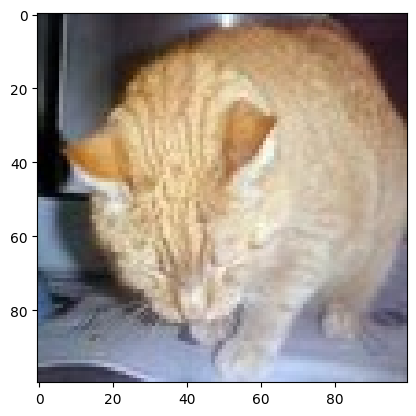

[[0.18225487]]


In [14]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

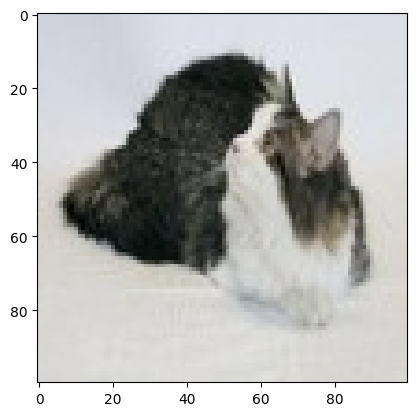

[[0.8503194]]
It is cat


In [23]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred >0.5

if(y_pred ==0):
    pred = 'dog'
else:
    pred='cat'
print("It is",pred)